Here we lauch a Random Forest on all features (also those that we don't have on the test)

In [26]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
%matplotlib inline

from helpers.data_loading import *
from spearman import score_function
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [14]:
meta, _ = load_meta_features(file="data/facial_features_train.csv", only_num=True)
y, _ = load_labels()

In [20]:
# cut into test, train
X_train, X_test, y_train, y_test = train_test_split(meta.as_matrix(), y, test_size=0.05, random_state=42)

In [21]:
rf = RandomForestRegressor(n_estimators=100)

In [22]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
preds = rf.predict(X_test)

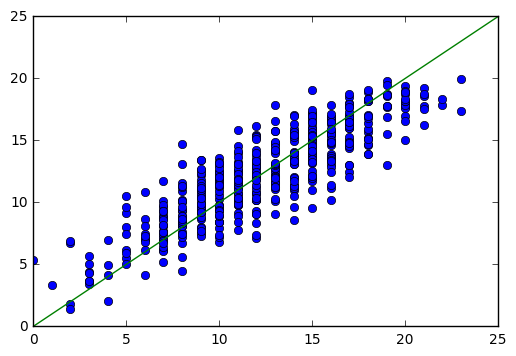

In [27]:
plt.figure()
plt.plot(y_test, preds, "o")
plt.plot([0,25], [0, 25])
plt.show()

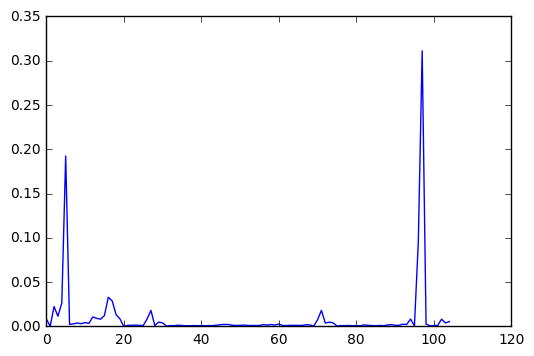

In [28]:
plt.plot(rf.feature_importances_)

In [32]:
# top ten features
print(meta.columns[np.argsort(rf.feature_importances_)[::-1]][0:10])

Index([u'sharpness_impact_p', u'background_impact_p', u'sharpness_impact_n',
       u'exposure_impact_n', u'exposure_impact_p', u'background_impact_n',
       u'angle_impact_n', u'position_impact_n', u'landmarks confidence',
       u'expression impact_p'],
      dtype='object')


In [33]:
score_function(y_pred=np.round(preds), y_true=y_test)

0.8496070091886494